### **Value at Risk (VaR)**

Value at Risk (VaR) is a measure of the potential loss in an investment portfolio over a specific time horizon and at a given confidence level.

VaR concentrates on the potential losses. We are not talking about actual or realized losses; rather, VaR is a kind of loss projection.

VaR has three key ingredients:

> Standard deviation that defines the level of loss.

> Fixed time horizon over which risk is assessed.

> Confidence interval.

VaR can be measured via three different approaches:

> Variance-covariance VaR

> Historical simulation VaR

> Monte Carlo VaR

Lets model differnt methods of VaR using Gold prices since 2020. VaR can be used to estimate the risk of an investment in gold prices by calculating the maximum amount of loss that could be expected with a given level of confidence. 

### **1. Variance-Covariance Method**


The variance-covariance method is also known as the parametric method,
because observations are assumed to be normally distributed.

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
# from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt

from scipy.stats import norm
import requests
from io import StringIO
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
df = yf.download('GLD', '2020-01-01', '2023-01-31', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02 00:00:00-05:00,143.860001,144.210007,143.399994,143.949997,7733800
2020-01-03 00:00:00-05:00,145.750000,146.320007,145.399994,145.860001,12272800
2020-01-06 00:00:00-05:00,148.440002,148.479996,146.949997,147.389999,14403300
2020-01-07 00:00:00-05:00,147.570007,148.139999,147.429993,147.970001,7978500
2020-01-08 00:00:00-05:00,148.490005,148.610001,146.139999,146.860001,22248500


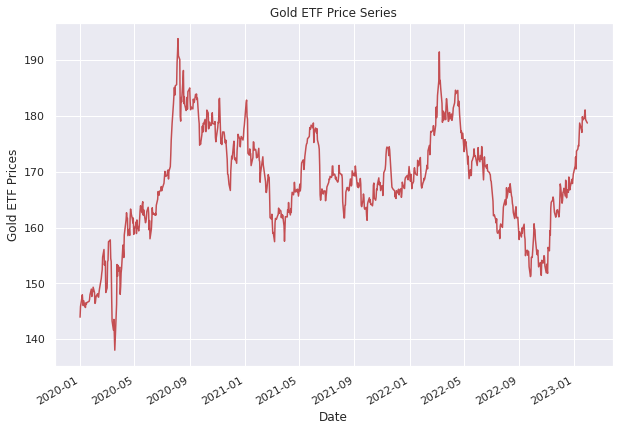

In [ ]:
# Only keep close columns
df = df[['Close']]

# Drop rows with missing values
df = df.dropna()

# Plot the closing price of GLD
df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [ ]:
df.head()

,Close
Date,
2020-01-02 00:00:00-05:00,143.949997
2020-01-03 00:00:00-05:00,145.860001
2020-01-06 00:00:00-05:00,147.389999
2020-01-07 00:00:00-05:00,147.970001
2020-01-08 00:00:00-05:00,146.860001


In [ ]:
#Calculating logarithmic return
log_returns = (np.log(df) -np.log(df.shift(1))).dropna()

In [ ]:
log_returns.head()

,Close
Date,
2020-01-03 00:00:00-05:00,0.013181
2020-01-06 00:00:00-05:00,0.010435
2020-01-07 00:00:00-05:00,0.003927
2020-01-08 00:00:00-05:00,-0.007530
2020-01-09 00:00:00-05:00,-0.005668


In [ ]:
# Drawing random numbers for weights
# Generating weights
gld_returns_mean = log_returns.mean()
weights = np.random.random(len(log_returns.columns))
weights /= np.sum(weights)
#calculating covariance
cov_var = log_returns.cov()
# standard deviation
gld_std = np.sqrt(weights.T.dot(cov_var).dot(weights))


In [ ]:
def VaR_parametric(initial_investment, conf_level):
  alpha = norm.ppf(1 - conf_level,gld_returns_mean, gld_std)
  
  ## portfolio
  # for i, j in zip(stocks.columns,range(len(stocks.columns))):
  #   VaR_param = (initial_investment -initial_investment *(1 + alpha))[j]
  #   print("Parametric VaR result for {} is {} ".format(i, VaR_param))
    
  VaR_param = (initial_investment - initial_investment* (1 + alpha))

  return VaR_param

In [ ]:
 initial_investment = 1e6
 conf_level = 0.95

 VaR_param = VaR_parametric(initial_investment,conf_level)
 print(VaR_param)

[16609.82536852]


#### Estimating the variance-covariance VaR model

VaR changes depending on the time horizon in the sense that holding assets
for a longer period makes an investor more susceptible to risk. As shown in
Figure 5-2, VaR increases in relation to holding time by the amount of √t.
Additionally, the holding period is the longest period for portfolio
liquidation. Taking into account the reporting purpose, a 30-day period may
be a more suitable one for an investor

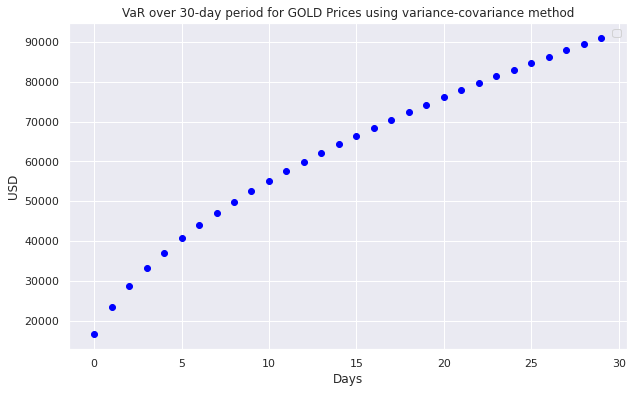

In [ ]:
var_horizon = []
time_horizon = 30


for i in range(1, time_horizon + 1):
  var_horizon.append(VaR_param * np.sqrt(i))


plt.plot(var_horizon[:time_horizon], "o",c='blue')
plt.xlabel("Days")
plt.ylabel("USD")
plt.title("VaR over 30-day period for GOLD Prices using variance-covariance method")
plt.legend()
plt.show()

### **2. Historical Simulation Method**


Having assumptions like, normally distributed data, may lead to inaccurate prediction. Historical Simulation Method is an empirical method: instead of using a parametric
approach, here we find the percentile, which is the Z-table equivalent of
variance-covariance method.

In [ ]:
###Calculating the 95% percentile of gold returns
def VaR_historical(initial_investment, conf_level):
  Hist_percentile95 =np.percentile(log_returns,5)

  return Hist_percentile95

In [ ]:
initial_investment = 1e6
conf_level = 0.95

Hist_percentile95 = VaR_historical(initial_investment, conf_level)
VaR_historical = (initial_investment -initial_investment *(1 + Hist_percentile95))

In [ ]:
print(VaR_historical)

17264.906038381043


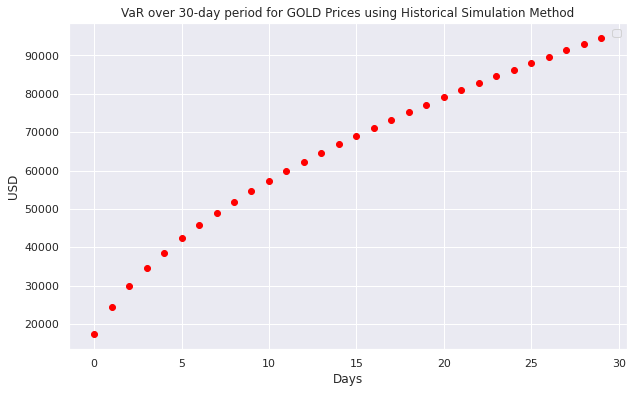

In [ ]:
### risk over time in Historical Simulation Method
var_horizon = []
time_horizon = 30


for i in range(1, time_horizon + 1):
  var_horizon.append(VaR_historical* np.sqrt(i))


plt.plot(var_horizon[:time_horizon], "o",c='red')
plt.xlabel("Days")
plt.ylabel("USD")
plt.title("VaR over 30-day period for GOLD Prices using Historical Simulation Method")
plt.legend()
plt.show()

### **3.  Monte Carlo Simulation VaR**

Monte Carlo is a highly efficient tool for
numerical approximation. Monte Carlo relies on repeated random samples
from a given distribution.

In [ ]:
num_reps = 1000

n=100

mean = np.random.randn(n).mean()
std = np.random.randn(n).std()
sim_data = pd.DataFrame(np.random.normal(mean, std,num_reps))


In [ ]:
sim_data.head()

,0
0,-0.422548
1,-0.279283
2,-1.326157
3,-0.867644
4,-0.501110


In [ ]:
###Calculating the 95% percentile of gold returns
def MC_VaR(initial_investment, conf_level):
  MC_percentile95 =np.percentile(sim_data,5)

  return MC_percentile95

In [ ]:
initial_investment = 1e6
conf_level = 0.95

MC_percentile95 = MC_VaR(initial_investment, conf_level)
VaR_MC = (initial_investment -initial_investment *(1 + MC_percentile95))

print(VaR_MC)

1524634.0517096554
